# Part 3 - Manar Awida

In [54]:
import pandas as pd
import numpy as np
import networkx as nx
import random
from random import randint
import matplotlib.pyplot as plt
random.seed(10)

### Load and Preprocess the data :

read the data from csv file :

In [2]:
# The borders between the countries

edges = pd.read_csv(r'C:\Users\IMOE001\Desktop\pr\border_info.csv')  

In [3]:
# happyiness score of all the Countries in 2015

Countries_happyiness_2015 = pd.read_csv(r'C:\Users\IMOE001\Desktop\pr\2015.csv')  

In [4]:
Countries_happyiness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
# happyiness score of all the Countries in 2016

Countries_happyiness_2016 = pd.read_csv(r'C:\Users\IMOE001\Desktop\pr\2016.csv')  

In [6]:
# happyiness score of all the Countries in 2017

Countries_happyiness_2017 = pd.read_csv(r'C:\Users\IMOE001\Desktop\pr\2017.csv')

In [7]:
# happyiness score of all the Countries in 2018

Countries_happyiness_2018 = pd.read_csv(r'C:\Users\IMOE001\Desktop\pr\2018.csv')

In [8]:
# happyiness score of all the Countries in 2019

Countries_happyiness_2019 = pd.read_csv(r'C:\Users\IMOE001\Desktop\pr\2019.csv')

In [9]:
# Compares socio-economic info with suicide rates by year and country:

suicides = pd.read_csv(r'C:\Users\IMOE001\Desktop\pr\master.csv')  

In [10]:
# Extract data from html :

from unicodedata import normalize

table_MN = pd.read_html(r"C:\Users\IMOE001\Desktop\pseco and cogni\List of Countries by Average Temperature - ListFist.html")

In [11]:
country_tump = table_MN[0]

In [12]:
country_tump.head()

,Rank,Flag[source],Country or Area[source],AverageTemperature(1991-2020)(°C)[source],ColdestMonth(1991-2020)(°C)[source],HottestMonth(1991-2020)(°C)[source],Variation(1991-2020)(°C)
0,1,NaN,Mali,28.83,19.4,34.6,15.2
1,2,NaN,Burkina Faso,28.71,22.9,33.9,11.0
2,3,NaN,Senegal,28.65,23.3,32.8,9.5
3,4,NaN,Tuvalu,28.45,27.1,29.6,2.5
4,5,NaN,Djibouti,28.38,22.7,34.1,11.4


## Create networks:


### get all the countries that we have on all the df :

In [15]:
# Take only the relevant columns of country and average temperature:

country_tump=country_tump.rename(columns={'Country or Area[source]':"Cname"})
country_tump=country_tump.rename(columns={'AverageTemperature(1991-2020)(°C)[source]':"Tavg"})

# List of Countries by Average Temperature
# Average Temperature (1991-2020)
country_tump=country_tump[['Cname','Tavg']]
country_tump.head(2)

,Cname,Tavg
0,Mali,28.83
1,Burkina Faso,28.71


In [16]:
# The number of countries we have in temperature dataset: 

len(country_tump.Cname)

196

In [17]:
# The countries in happiness reports :

all_countries_2015 = list(Countries_happyiness_2015.Country)
all_countries_2016 = list(Countries_happyiness_2016.Country)
all_countries_2017 = list(Countries_happyiness_2017.Country)
all_countries_2018 = list(Countries_happyiness_2018.Country)
all_countries_2019 = list(Countries_happyiness_2019.Country)

In [18]:
# The number of countries we have in Happiness Score dataset (2015-2019):

len(all_countries_2015) , len(all_countries_2016), len(all_countries_2017) ,len(all_countries_2018) ,len(all_countries_2019)

(158, 157, 155, 156, 156)

--------------------------------------------------------------------------------------------------------------------------

* Because i choose that the countries as nodes in the network.and every contry have  information about Happiness Score, Region and temperature.
* because of this we will now examine the Intersection between all the countries we have in the datasets

In [19]:
countries=list(set(country_tump.Cname) & set(all_countries_2015) & set(all_countries_2016) & set(all_countries_2017) & set(all_countries_2018) & set(all_countries_2019))

In [20]:
# All countries included in the network : 

print (str(countries)[1:-1])
len(countries)

'Estonia', 'Iraq', 'Romania', 'Hungary', 'India', 'Greece', 'Turkmenistan', 'Jordan', 'El Salvador', 'Mauritania', 'Pakistan', 'Nigeria', 'Mongolia', 'Egypt', 'Thailand', 'Azerbaijan', 'Costa Rica', 'Switzerland', 'Turkey', 'Malaysia', 'Bhutan', 'Finland', 'Uruguay', 'Yemen', 'Luxembourg', 'Singapore', 'Sri Lanka', 'Croatia', 'New Zealand', 'Bosnia and Herzegovina', 'Afghanistan', 'Guatemala', 'Colombia', 'Chad', 'Philippines', 'Georgia', 'Madagascar', 'Mexico', 'Cameroon', 'Sierra Leone', 'Botswana', 'Liberia', 'Serbia', 'Belarus', 'Iceland', 'Panama', 'Qatar', 'Slovakia', 'Latvia', 'Brazil', 'Australia', 'Portugal', 'Kuwait', 'Myanmar', 'Dominican Republic', 'Canada', 'Armenia', 'Peru', 'Denmark', 'Uganda', 'Chile', 'Belgium', 'Morocco', 'Albania', 'Kazakhstan', 'Netherlands', 'Gabon', 'Spain', 'Poland', 'Ecuador', 'Lithuania', 'Cambodia', 'Saudi Arabia', 'Ethiopia', 'Nicaragua', 'Israel', 'Rwanda', 'Burundi', 'Jamaica', 'Malta', 'Cyprus', 'Mauritius', 'Ghana', 'Benin', 'Zimbabwe', '

124

#### I have 124 countries in my networks

In [21]:
# make a sub dataframe that contain only the 124 countries :

Countries_happyiness_2015 = Countries_happyiness_2015.loc[Countries_happyiness_2015['Country'].isin(countries)]
Countries_happyiness_2016 = Countries_happyiness_2016.loc[Countries_happyiness_2016['Country'].isin(countries)]
Countries_happyiness_2017 = Countries_happyiness_2017.loc[Countries_happyiness_2017['Country'].isin(countries)]
Countries_happyiness_2018 = Countries_happyiness_2018.loc[Countries_happyiness_2018['Country'].isin(countries)]
Countries_happyiness_2019 = Countries_happyiness_2019.loc[Countries_happyiness_2019['Country'].isin(countries)]

country_tump = country_tump.loc[country_tump["Cname"].isin(countries)]

Delete all the nodes and edges that not exist in the happiness report


In [22]:
# delete all the nodes and edges that not exist in the happiness report

for index, row in edges.iterrows():
    if row['country_name'] not in countries or row['country_border_name'] not in countries :
        edges = edges.drop(index)

---------------------------------------------------------

##### Data processing of suicide and joy for 2015

In [23]:
# happyiness score of all the Countries in 2015

compare_happyiness_2015 = pd.read_csv(r'C:\Users\IMOE001\Desktop\pr\2015.csv')

# The borders between the countries

edges_compere = pd.read_csv(r'C:\Users\IMOE001\Desktop\pr\border_info.csv')  

In [24]:
suicides=suicides.loc[suicides['year'] == 2015]

suicide_country= list(set(suicides.country))

len(suicide_country)

62

In [25]:
compare_country = list(set(suicides.country) & set(all_countries_2015) & set(country_tump.Cname))

In [26]:
suicides_2015={}
for i in compare_country:
    sui = suicides.loc[suicides['country'] == i]['suicides_no'].sum()
    population = suicides.loc[suicides['country'] == i]['population'].sum()
    suicides_2015[i]=[float(sui/population*10000)] 

In [27]:
suicides_df=pd.DataFrame.from_dict(suicides_2015, orient='index')
suicides_df.head(2)

,0
Australia,1.361013
Estonia,1.568217


- I will build a network that compare the percentage of the Happiness Score with the number of suicides in one year (2015)
- so we will also take a look at the country's  of the suicides dataset  and the countries in Happiness Score_2015 dataset.

In [28]:
compare_happyiness_2015 = compare_happyiness_2015.loc[compare_happyiness_2015['Country'].isin(compare_country)]

In [29]:
len(set(compare_happyiness_2015.Country))

50

In [30]:
# All countries included in the compare network : 

print (str(compare_country)[1:-1])
len(compare_country)

'Australia', 'Estonia', 'Singapore', 'Romania', 'Ukraine', 'Sweden', 'Japan', 'Croatia', 'Hungary', 'Armenia', 'Denmark', 'Chile', 'Greece', 'Guatemala', 'Colombia', 'Slovenia', 'Belgium', 'Turkmenistan', 'Norway', 'Georgia', 'Kyrgyzstan', 'Kazakhstan', 'Netherlands', 'South Africa', 'Thailand', 'Mexico', 'Poland', 'Spain', 'Ecuador', 'Switzerland', 'Lithuania', 'Serbia', 'Turkey', 'Italy', 'Germany', 'Israel', 'Nicaragua', 'Iceland', 'Finland', 'Argentina', 'Uruguay', 'Panama', 'Malta', 'Austria', 'Cyprus', 'Luxembourg', 'Latvia', 'Mauritius', 'Qatar', 'Brazil'


50

In [31]:
compare_tump = country_tump.loc[country_tump["Cname"].isin(compare_country)]

In [32]:
len(compare_country)

50

In [33]:
for index, row in edges_compere.iterrows():
    if row['country_name'] not in compare_country or row['country_border_name'] not in compare_country :
        edges_compere = edges_compere.drop(index)

In [34]:
len(set(edges_compere.country_name))


37

----------------------------------------------------------------------------------------------------------------

### Create the relevent netwrks to the countries:

In [35]:
def creat_network(df_Countries, edges):
    G = nx.Graph() 

    G.Region = {}
    G.Happiness_Score = {}
    G.Happiness_Rank = {}
    G.Temperature = {}
    
    # add the edges :
    G=nx.from_pandas_edgelist(edges, 'country_name', 'country_border_name')
    
    #add the nodes:
    G.add_nodes_from(countries)
    
    # add nodes attributes :
    G.Region= pd.Series(Countries_happyiness_2015.Region.values, index=countries).to_dict()
    G.Happiness_Score = pd.Series(df_Countries["Happiness Score"].values, index=countries).to_dict()
    G.Temperature = pd.Series(country_tump.Tavg.values, index = countries).to_dict()
    G.Happiness_Rank = pd.Series(df_Countries["Happiness Rank"].values, index=countries).to_dict()

    nx.set_node_attributes(G, G.Region,  'Region')
    nx.set_node_attributes(G, G.Happiness_Score,  'Happiness Score')
    nx.set_node_attributes(G, G.Temperature,  'Temperature')
    nx.set_node_attributes(G, G.Happiness_Rank,  'Happiness Rank')

    return G

In [36]:
# create graph for 2017
H1=creat_network(Countries_happyiness_2015,edges)

In [37]:
# create graph for 2017
H2=creat_network(Countries_happyiness_2016,edges)

In [38]:
# create graph for 2017
H3=creat_network(Countries_happyiness_2017,edges)

In [39]:
# create graph for 2017
H4=creat_network(Countries_happyiness_2018,edges)

In [40]:
# create graph for 2017
H5=creat_network(Countries_happyiness_2019,edges)

In [41]:
def creat_compare_network(df_Countries, edges):
    G = nx.Graph() 

    G.Region = {}
    G.Happiness_Score = {}
    G.Happiness_Rank = {}
    G.Temperature = {}
    
    # add the edges :
    G=nx.from_pandas_edgelist(edges_compere, 'country_name', 'country_border_name')
    
    #add the nodes:
    G.add_nodes_from(compare_country)
    
    # add nodes attributes :
    G.Region= pd.Series(compare_happyiness_2015.Region.values, index=compare_country).to_dict()
    G.Happiness_Score = pd.Series(df_Countries["Happiness Score"].values, index=compare_country).to_dict()
    G.Temperature = pd.Series(compare_tump.Tavg.values, index = compare_country).to_dict()
    G.Happiness_Rank = pd.Series(df_Countries["Happiness Rank"].values, index=compare_country).to_dict()

    nx.set_node_attributes(G, G.Region,  'Region')
    nx.set_node_attributes(G, G.Happiness_Score,  'Happiness Score')
    nx.set_node_attributes(G, G.Temperature,  'Temperature')
    nx.set_node_attributes(G, G.Happiness_Rank,  'Happiness Rank')

    return G

In [42]:
C1 = creat_compare_network(compare_happyiness_2015,edges)

In [43]:
# create the suside network 

C2 = nx.Graph() 
C2 =nx.from_pandas_edgelist(edges_compere, 'country_name', 'country_border_name')
C2.add_nodes_from(suicides_2015.keys())
C2.suside_rate = {}

C2.suside_rate= suicides_2015
nx.set_node_attributes(C2, C2.suside_rate,  'Happiness Rank')

-------------------------------------------

##  color the network :

In [55]:
def color_Happiness_Score(G,vis):
    g=list(G.Happiness_Score.values())
    splited=np.array_split(g, 3)
    happy=splited[0].max()
    neutral=splited[1].max()
    sad=splited[2].max()
    color_map = []
    GG={}
    for node in G:
        if(G.Happiness_Score[node] <= sad):
            GG[node] = 0
            color_map.append("r")
            continue
        if(G.Happiness_Score[node] <= neutral):
            color_map.append("g")
            GG[node] = 2
            continue
        else: 
            color_map.append("y")
            GG[node] = 1
   # d=G.Happiness_Score
    if vis:
        d=G.Happiness_Rank
        plt.figure(figsize=(25,25))
        nx.draw(G, node_color=color_map,nodelist=d.keys(), node_size=[v*10 for v in d.values()],labels= G.Happiness_Rank)
    return GG


In [56]:
def color_Happiness_Region(G):
    all_Region=list(set(G.Region.values()))
    
    colors = []
    for i in range(len(all_Region)):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
        
    R ={}
    for i in range(1,len(all_Region)+1):
        R[all_Region[i-1]]=colors[i-1]
    
    color_map = []
    for node in H1:
        color_map.append(R[H1.Region[node]])
        
    
    d=G.Happiness_Rank
    plt.figure(figsize=(25,25))
    nx.draw(G, node_color=color_map,nodelist=d.keys(), node_size=[v*10 for v in d.values()],labels= G.Happiness_Rank)
    plt.show()

Add Temperature_level attribute to the graphs :

In [57]:
H1.hppiness=color_Happiness_Score(H1,False)
nx.set_node_attributes(H1, H1.hppiness,  'hppiness')

H2.hppiness=color_Happiness_Score(H2,False)
nx.set_node_attributes(H2, H2.hppiness,  'hppiness')

H3.hppiness=color_Happiness_Score(H3,False)
nx.set_node_attributes(H3, H3.hppiness,  'hppiness')

H4.hppiness=color_Happiness_Score(H4,False)
nx.set_node_attributes(H4, H4.hppiness,  'hppiness')

H5.hppiness=color_Happiness_Score(H5,False)
nx.set_node_attributes(H5, H5.hppiness,  'hppiness')


In [58]:
def Temperature_level(dect):
    e={}
    for i in dect:
        if dect[i] >=-15 and dect[i]<6:
            e[i] = ("cold")
        elif dect[i]>=6 and dect[i]<15:
            e[i] = ("moderate")
        else : e[i] = ("warm")
    return e

In [59]:
H1.Temperature_level = Temperature_level(H1.Happiness_Score)
H2.Temperature_level = Temperature_level(H2.Happiness_Score)
H3.Temperature_level = Temperature_level(H3.Happiness_Score)
H4.Temperature_level = Temperature_level(H4.Happiness_Score)
H5.Temperature_level = Temperature_level(H5.Happiness_Score)

In [69]:
H1.Temperature_level

{'Estonia': 'moderate',
 'Iraq': 'moderate',
 'Romania': 'moderate',
 'Hungary': 'moderate',
 'India': 'moderate',
 'Greece': 'moderate',
 'Turkmenistan': 'moderate',
 'Jordan': 'moderate',
 'El Salvador': 'moderate',
 'Mauritania': 'moderate',
 'Pakistan': 'moderate',
 'Nigeria': 'moderate',
 'Mongolia': 'moderate',
 'Egypt': 'moderate',
 'Thailand': 'moderate',
 'Azerbaijan': 'moderate',
 'Costa Rica': 'moderate',
 'Switzerland': 'moderate',
 'Turkey': 'moderate',
 'Malaysia': 'moderate',
 'Bhutan': 'moderate',
 'Finland': 'moderate',
 'Uruguay': 'moderate',
 'Yemen': 'moderate',
 'Luxembourg': 'moderate',
 'Singapore': 'moderate',
 'Sri Lanka': 'moderate',
 'Croatia': 'moderate',
 'New Zealand': 'moderate',
 'Bosnia and Herzegovina': 'moderate',
 'Afghanistan': 'moderate',
 'Guatemala': 'moderate',
 'Colombia': 'moderate',
 'Chad': 'moderate',
 'Philippines': 'moderate',
 'Georgia': 'moderate',
 'Madagascar': 'cold',
 'Mexico': 'cold',
 'Cameroon': 'cold',
 'Sierra Leone': 'cold',
 

In [60]:
nx.set_node_attributes(H1, H1.Temperature_level,  'Temperature level')
nx.set_node_attributes(H2, H2.Temperature_level,  'Temperature level')
nx.set_node_attributes(H3, H3.Temperature_level,  'Temperature level')
nx.set_node_attributes(H4, H4.Temperature_level,  'Temperature level')
nx.set_node_attributes(H5, H5.Temperature_level,  'Temperature level')

In [61]:
def color_Temperature_level(G):
    all1=list(set(G.Temperature_level.values()))
    
    colors = []
    for i in range(len(all1)):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
        
    R ={}
    for i in range(1,len(all1)+1):
        R[all1[i-1]]=colors[i-1]
    
    color_map = []
    for node in H1:
        color_map.append(R[G.Temperature_level[node]])
        
    
    d=G.Happiness_Rank
    plt.figure(figsize=(25,25))

    nx.draw(H1, node_color=color_map,nodelist=d.keys(), node_size=[v*10 for v in d.values()],labels= G.Happiness_Rank)
    plt.show()


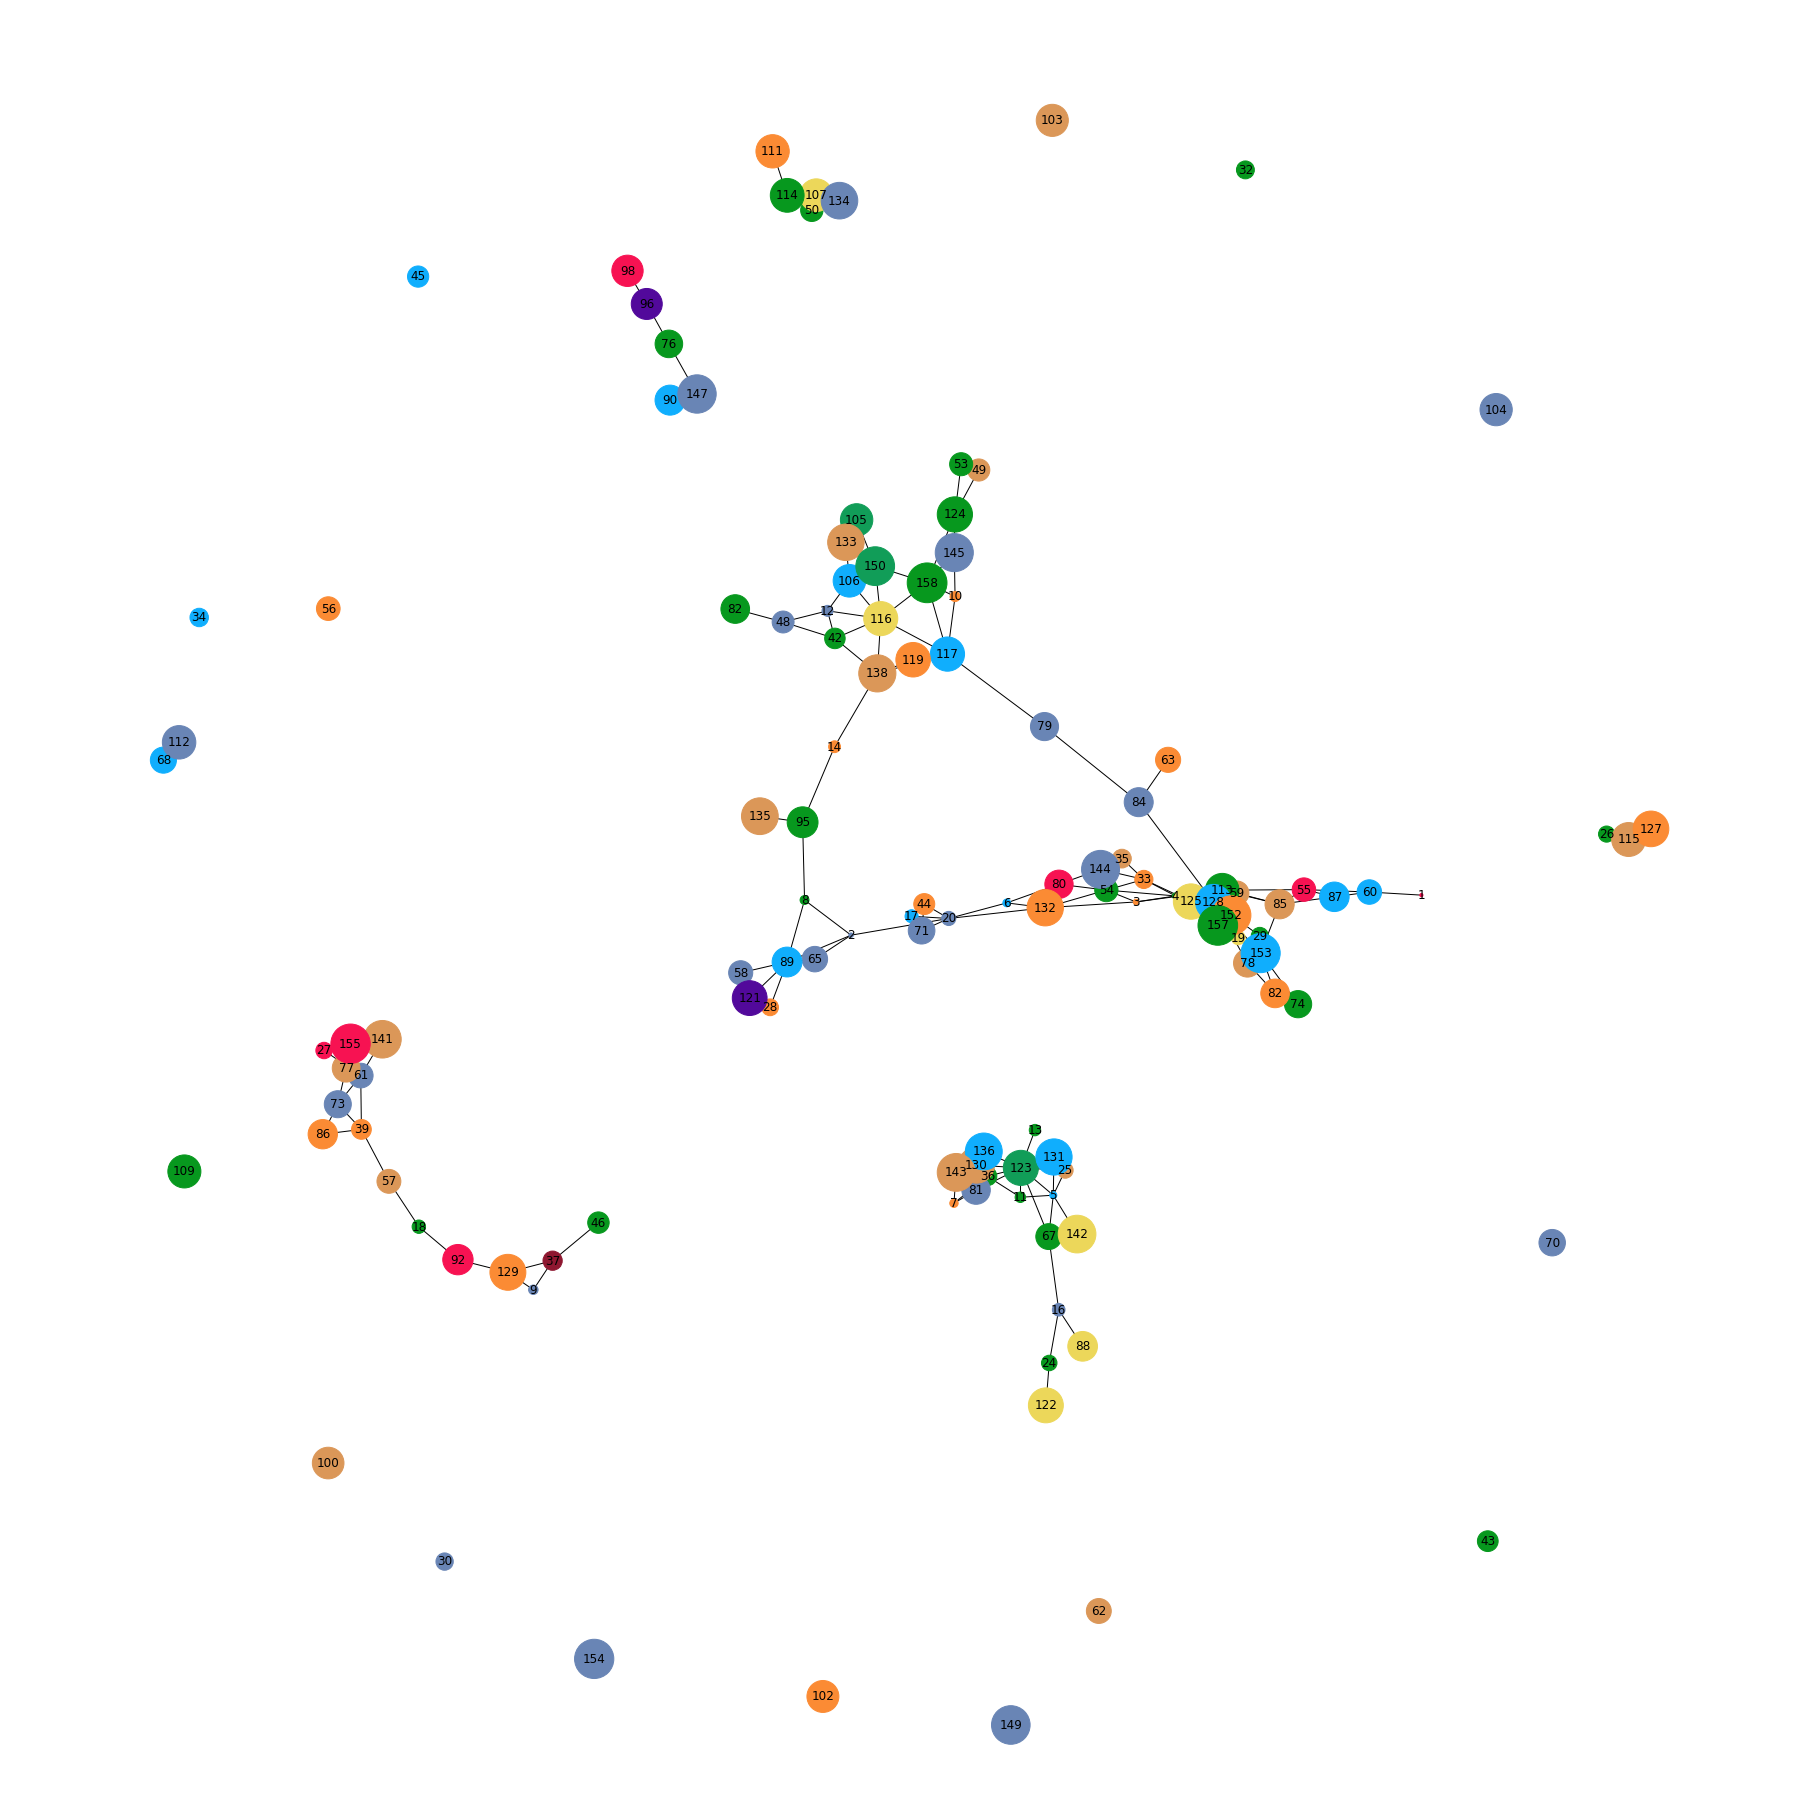

In [62]:
color_Happiness_Region(H1)

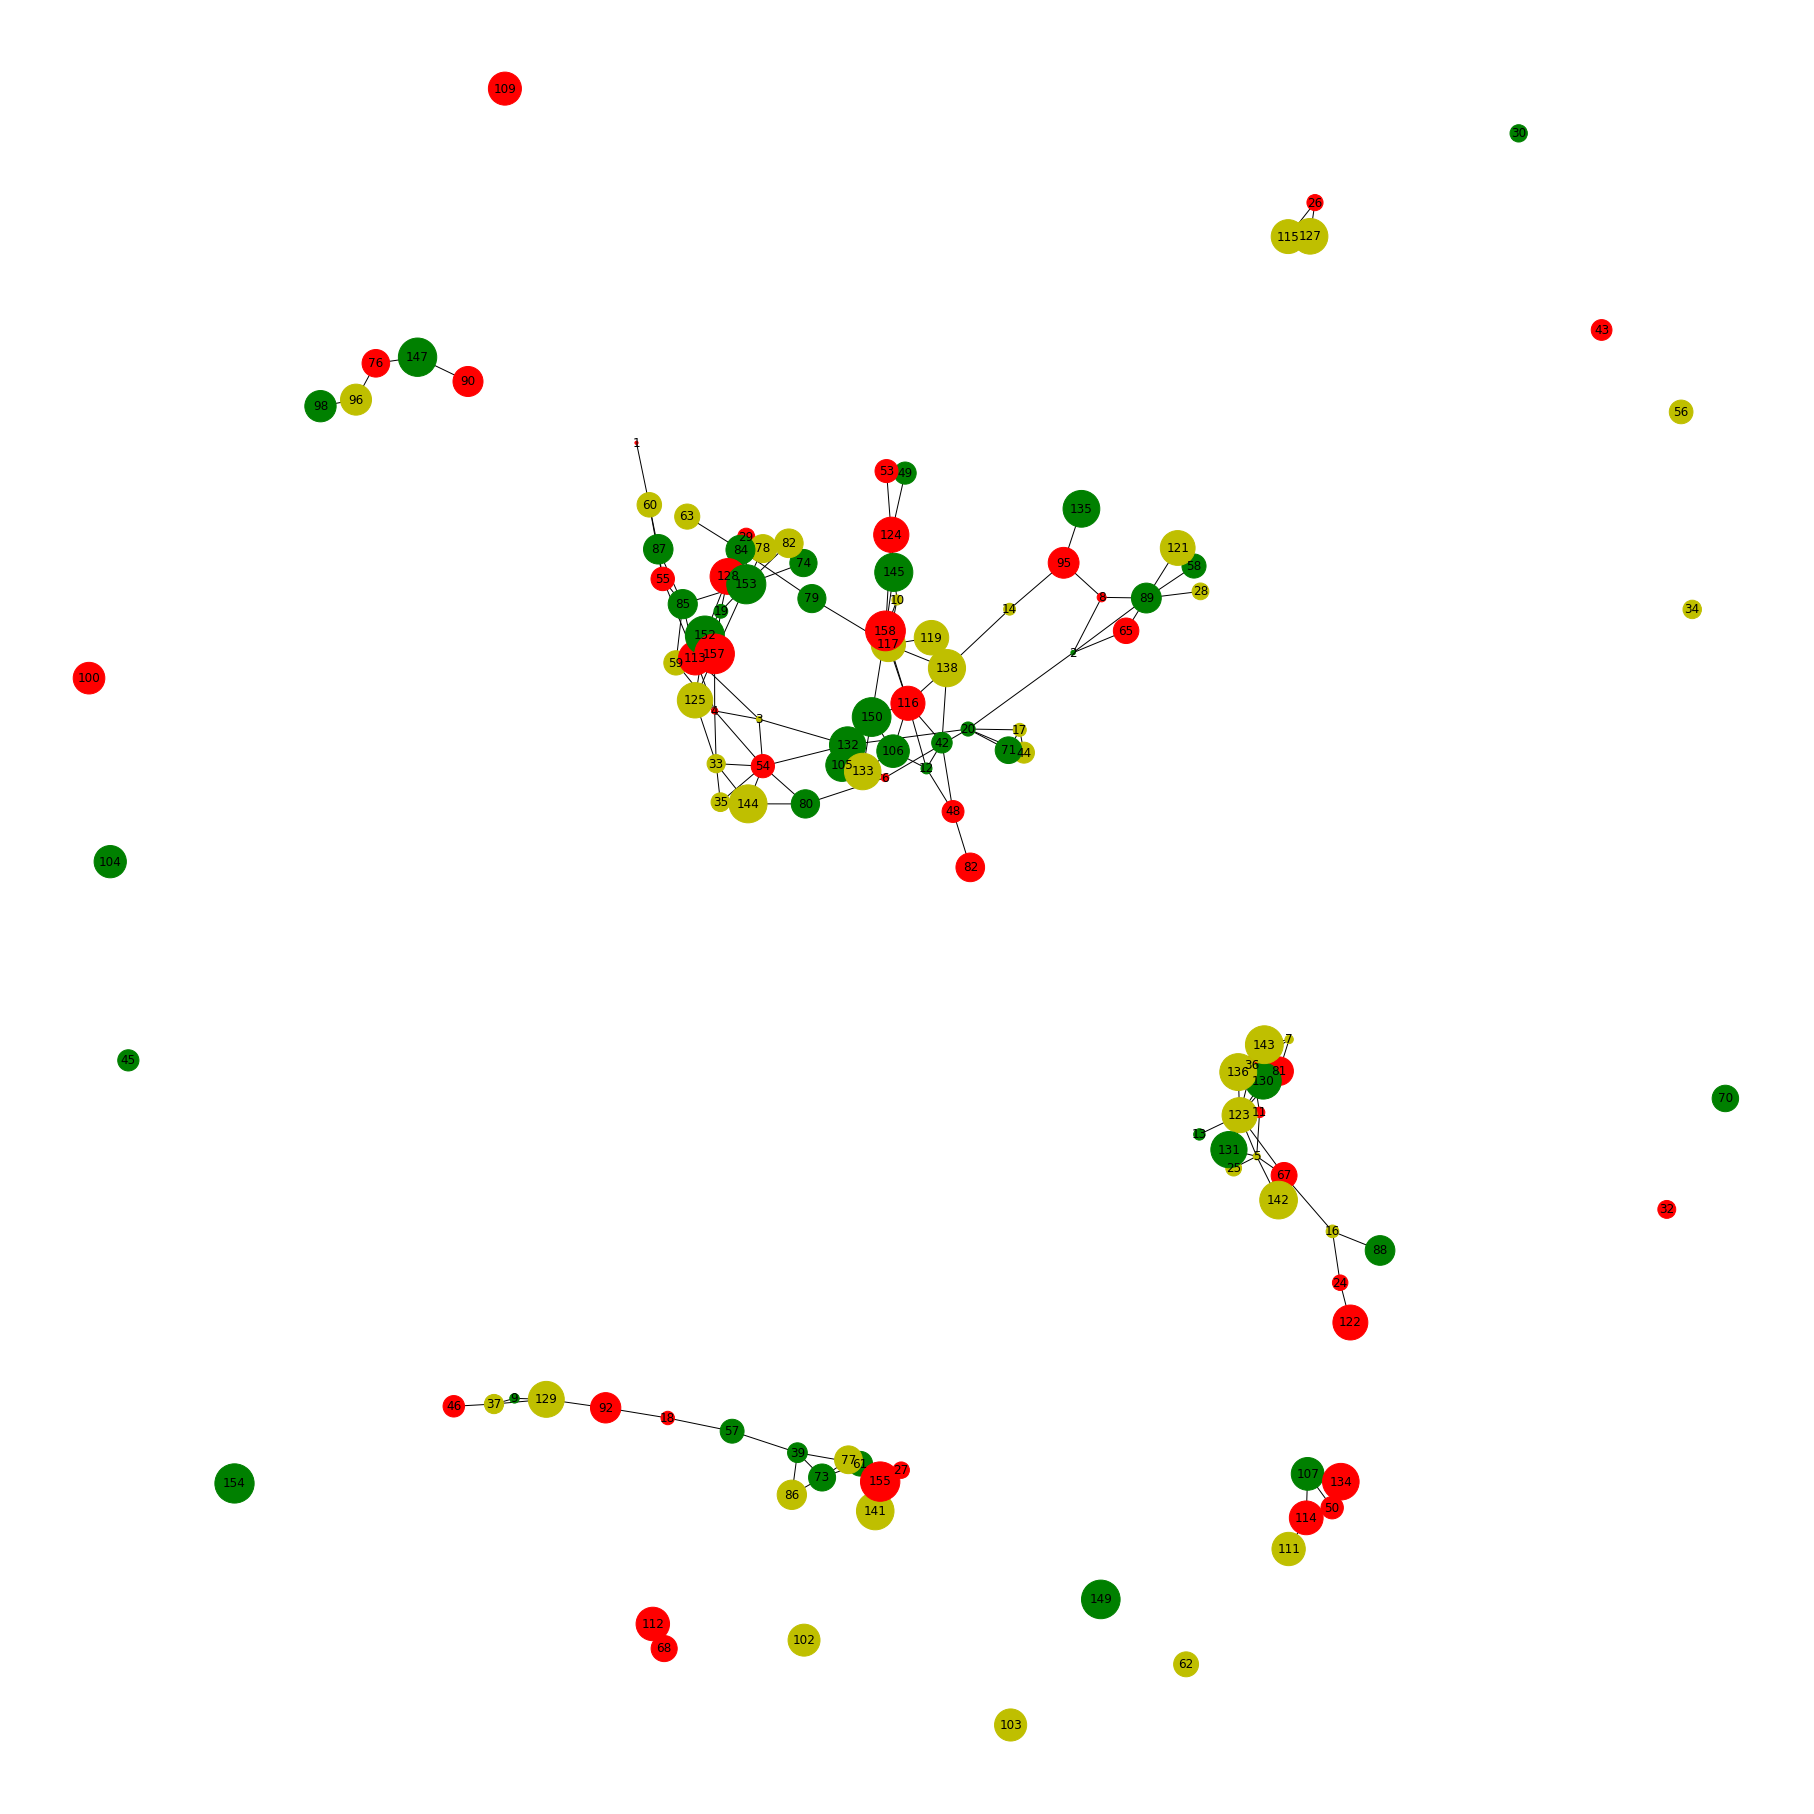

In [81]:
l= color_Happiness_Score(H1,True)

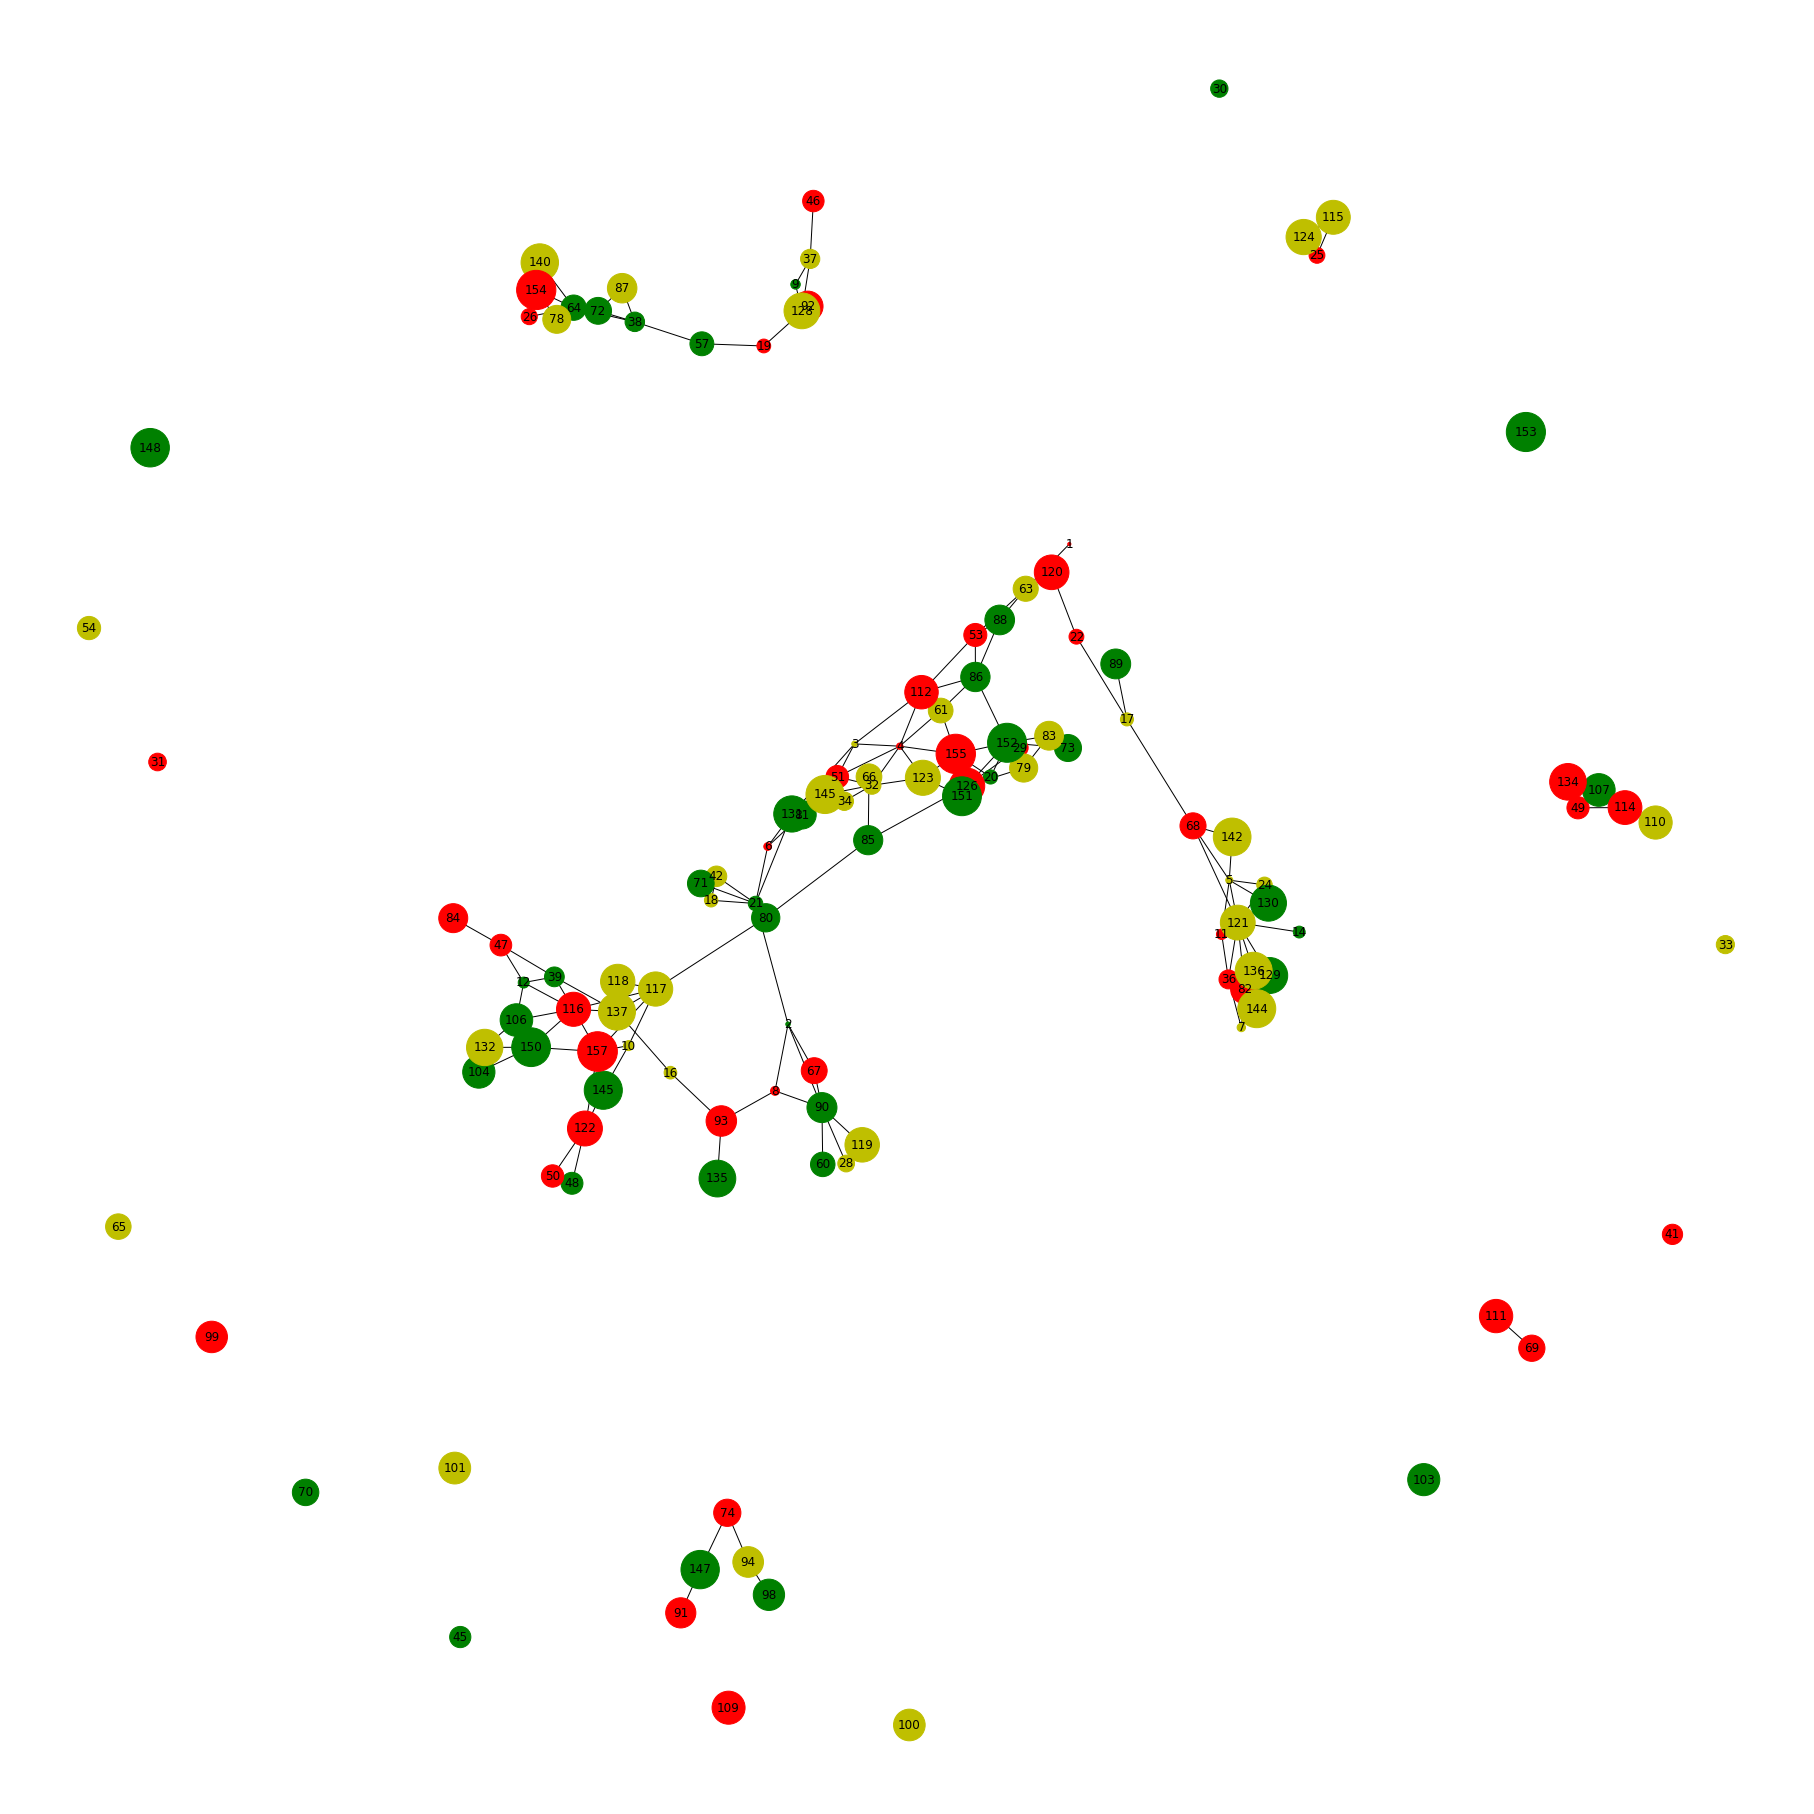

In [82]:
l= color_Happiness_Score(H2,True)

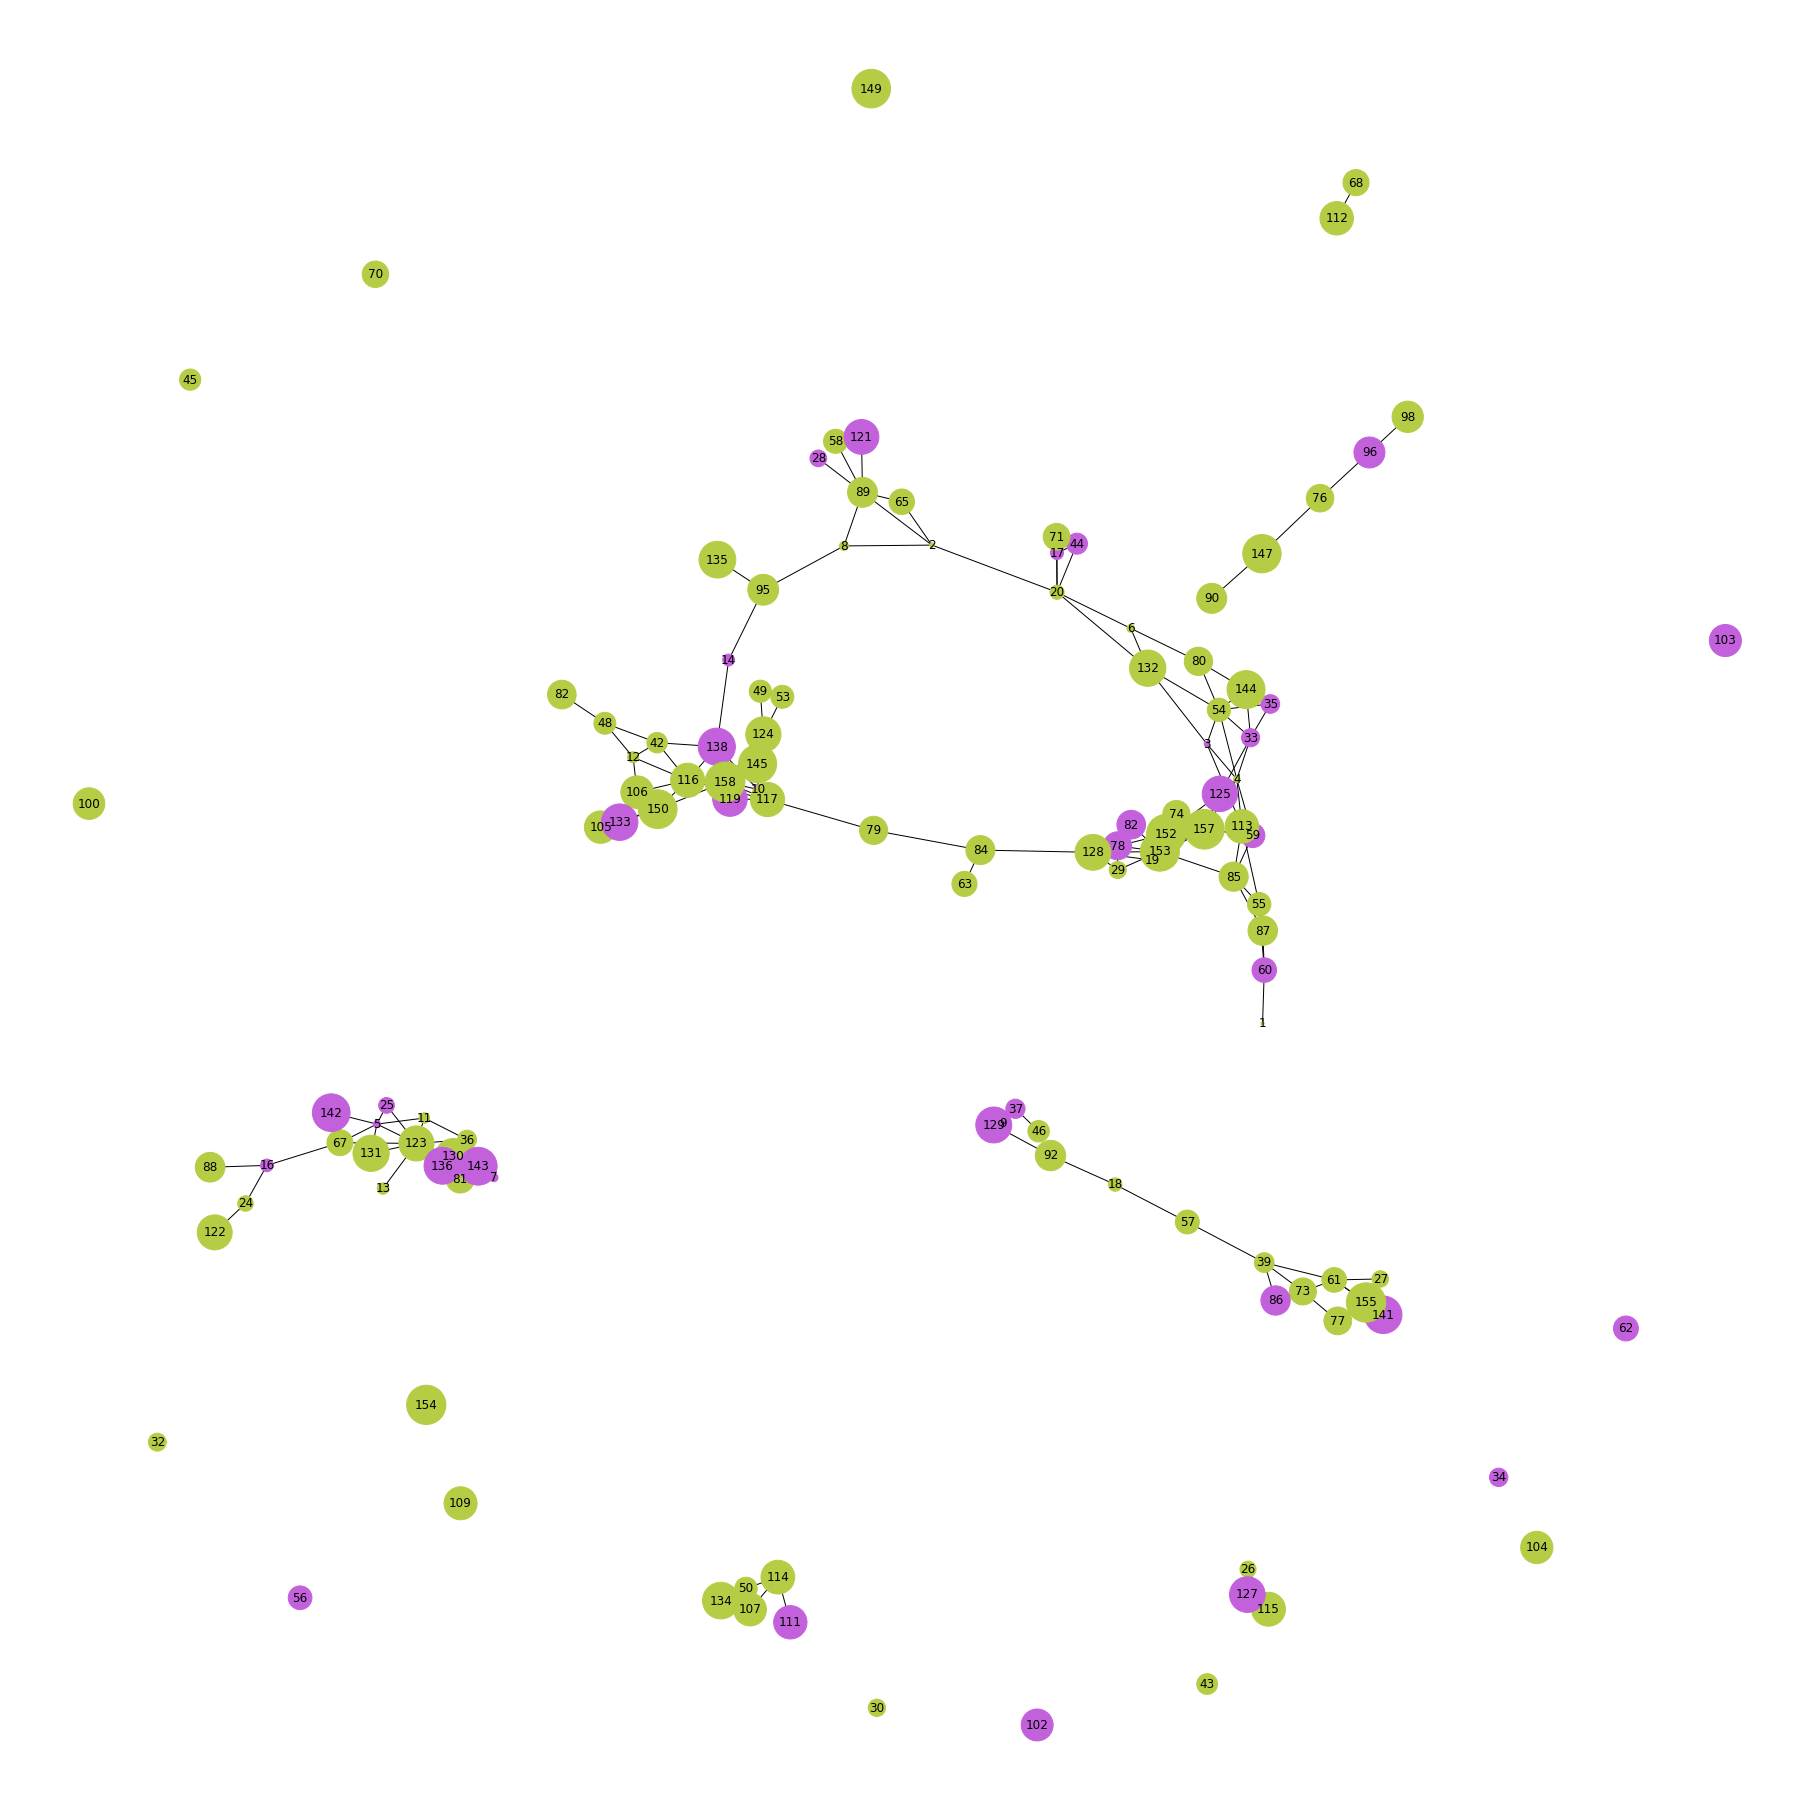

In [68]:
color_Temperature_level(H1)

# Networking algorithms

In [70]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation
import pydot
import EoN
import random
random.seed(42)
import community as community_louvain
from networkx.algorithms import community
import networkx.algorithms.community as nx_comm
from statistics import mean
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import collections
import matplotlib.pyplot as plt
import networkx as nx

from netgraph import Graph

In [71]:
def get_graph_info(graph):
    print("Number of nodes:", graph.number_of_nodes())
    print("Number of edges:", graph.number_of_edges())
    print("Average Cluster Coefficients:", nx.average_clustering(graph))
    print("Connected components:", len(list(nx.connected_components(graph))))

In [72]:
get_graph_info(H1)

Number of nodes: 124
Number of edges: 174
Average Cluster Coefficients: 0.37628008192524315
Connected components: 22


In [73]:
get_graph_info(H2)

Number of nodes: 124
Number of edges: 174
Average Cluster Coefficients: 0.37628008192524315
Connected components: 22


 Check the modularity of the graph :

In [74]:
def modular(G,T):
    
    new_dict = {}
    for key, value in T.items():
        if value in new_dict:
            new_dict[value].append(key)
        else:
            new_dict[value]=[key]
    TT=[]
    for i in new_dict:
        TT.append(new_dict[i])
    return  nx_comm.modularity(G, TT)

In [65]:
modular(H1,H1.Temperature_level),modular(H1,H1.hppiness),modular(H1,H1.Region)

(-0.06184766811996306, -0.007282996432818087, -0.05154247588849255)

In [66]:
partition = community_louvain.best_partition(H1)


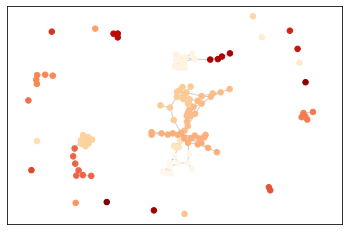

In [67]:
pos = nx.spring_layout(H1)

cmap = cm.get_cmap('OrRd', max(partition.values()) + 1)
nx.draw_networkx_nodes(H1, pos, partition.keys(), node_size=30,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(H1, pos, alpha=0.2)
plt.show()

In [68]:
# get the node in every partition
groups = set(partition.values())
lou = {el:[] for el in groups}
for node in partition:
    L = list(lou[partition[node]])
    L.append(node)
    lou[partition[node]] = L

In [69]:
lv =[]
for i in lou:
    lv.append(lou[i])

In [70]:
nx_comm.modularity(H1, lv)

0.8000891795481568

compearing networkx:

In [167]:
modular(H1,H1.hppiness),modular(H2,H2.hppiness),modular(H3,H3.hppiness),modular(H4,H4.hppiness),modular(H5,H5.hppiness)

(-0.007282996432818087,
 -0.007282996432818087,
 -0.007282996432818087,
 -0.007282996432818087,
 -0.007282996432818087)

add to 2017-2019 

In [83]:
Countries_happyiness_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [84]:
country_region = H1.Region

In [110]:
Countries_happyiness_2019["Region"] = Countries_happyiness_2019["Country"].map(country_region)
Countries_happyiness_2018["Region"] = Countries_happyiness_2018["Country"].map(country_region)
Countries_happyiness_2017["Region"] = Countries_happyiness_2017["Country"].map(country_region)
Countries_happyiness_2016["Region"] = Countries_happyiness_2016["Country"].map(country_region)
Countries_happyiness_2015["Region"] = Countries_happyiness_2015["Country"].map(country_region)


In [111]:
Countries_happyiness_2015["Year"] = 2015
df_2015 = Countries_happyiness_2015.set_index("Year")

Countries_happyiness_2016["Year"] = 2016
df_2016 = Countries_happyiness_2016.set_index("Year")

Countries_happyiness_2017["Year"] = 2017
df_2017 = Countries_happyiness_2017.set_index("Year")

Countries_happyiness_2018["Year"] = 2018
df_2018 = Countries_happyiness_2018.set_index("Year")

Countries_happyiness_2019["Year"] = 2019
df_2019 = Countries_happyiness_2019.set_index("Year")

In [112]:
df_merge = pd.concat([df_2015, df_2016,df_2017,df_2018,df_2019])

In [102]:
df_merge

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Year,,,,,,,,,,,,,,,,,,,,,
2015,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,Botswana,Western Europe,148,3.488,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.041,1.145,0.538,0.455,0.100
2019,Malawi,Central and Eastern Europe,150,3.410,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.191,0.560,0.495,0.443,0.089
2019,Yemen,Middle East and Northern Africa,151,3.380,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.287,1.163,0.463,0.143,0.077


In [113]:
import plotly.express as px

In [115]:
fig = px.line(df_merge[df_merge["Region"] == "Western Europe"].reset_index(), 
              x="Year",
              y="Happiness Score",
              color='Country',
              title="Western Europe")
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 2015,
        dtick = 1
    )
)
fig.show()

# Conclusion

After all the data processing and experiments done on them, I deduced from the network I built, not really much can be learned about the network itself, the edges do not strengthen my network, and the claims are not subject to proof in the network.